In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
#load mode
model_dir ='/media/SSD/BearHouse-Person-Model/models/B5R1_Gender_500.h5' #แก้
model = load_model(model_dir)
height = width = model.input_shape[1]

In [ ]:
#Train
dataframe = pd.read_csv('/home/yupaporn/code/EffNet-Person-Classify/data_label_by_tan_10082023_splited_imgpath28_train_1img.csv') 
dataframe = dataframe[dataframe['img_no'] ==1]
base_dir = '/media/SSD/BearHouse-Person-Data/'
os.chdir(base_dir)
train_dir = os.path.join(base_dir, 'train')

#validation
valframe = pd.read_csv('/home/yupaporn/code/EffNet-Person-Classify/data_label_by_tan_10082023_splited_imgpath28_val_1img.csv') 
valframe = valframe[valframe['img_no'] ==1]
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
batch_size = 1
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'path_img_28',
        y_col = 'gender',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(
        dataframe = valframe,
        directory = validation_dir,
        x_col = 'path_img_28',
        y_col = 'gender',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

# Select Data

In [6]:
import pandas as pd
# df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Testdf.csv')
df0 = pd.read_csv('/home/yupaporn/code/EffNet-Person-Classify/data_label_by_tan_10082023_splited_imgpath28.csv') 
df0 = df0[df0['split'] =='test']
dataframe = df0[df0['img_no'] ==1]
# print(df0 .shape)
print(dataframe.shape)
print('Men: ',dataframe[dataframe['gender']=='Men'].shape)
print('Women: ',dataframe[dataframe['gender']=='Women'].shape)
print('motorcycle: ',dataframe[dataframe['gender']=='motorcycle'].shape)
dataframe.head(5)

(803, 14)
Men:  (315, 14)
Women:  (348, 14)
motorcycle:  (140, 14)


/home/yupaporn/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,path_img,img_no,branch,Path_folder_web,camera_angle,gender,category,work_by,status,clip_from,split,path_img_28
226671,226671,31,/media/hdd/tan/code/Show-Images/static/BearHou...,1,CCON,BearHouse-Person/CCON_ch7_20230310130001_20230...,ch7,Women,Working,Nat,NaN,Bear-House,test,/media/SSD/BearHouse-Person/CCON_ch7_202303101...
226704,226704,8,/media/hdd/tan/code/Show-Images/static/BearHou...,1,CCON,BearHouse-Person/CCON_ch7_20230310130001_20230...,ch7,Men,Working,Nat,Fair,Bear-House,test,/media/SSD/BearHouse-Person/CCON_ch7_202303101...
226739,226739,16,/media/hdd/tan/code/Show-Images/static/BearHou...,1,CCON,BearHouse-Person/CCON_ch7_20230310130001_20230...,ch7,Men,Working,Nat,NaN,Bear-House,test,/media/SSD/BearHouse-Person/CCON_ch7_202303101...
226776,226776,60,/media/hdd/tan/code/Show-Images/static/BearHou...,1,CCON,BearHouse-Person/CCON_ch7_20230310130001_20230...,ch7,Women,Working,Nat,NaN,Bear-House,test,/media/SSD/BearHouse-Person/CCON_ch7_202303101...
226851,226851,21,/media/hdd/tan/code/Show-Images/static/BearHou...,1,CCON,BearHouse-Person/CCON_ch7_20230310130001_20230...,ch7,Women,Working,Nat,NaN,Bear-House,test,/media/SSD/BearHouse-Person/CCON_ch7_202303101...


# Prediction

In [13]:
# base_dir = '/media/SSD/BearHouse-Person-Data/validation'
# os.chdir(base_dir)

In [8]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['path_img_28'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

NameError: name 'height' is not defined

# Visualization

In [15]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['gender'])
print('Actual : ',len(classe))
print(classe)

Predicted :  3
{'motorcycle', 'Men', 'Women'}
Actual :  3
{'motorcycle', 'Men', 'Women'}


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['gender'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 83.20373250388802%
              precision    recall  f1-score   support

         Men       0.81      0.84      0.82       257
       Women       0.86      0.82      0.84       276
  motorcycle       0.82      0.85      0.83       110

    accuracy                           0.83       643
   macro avg       0.83      0.83      0.83       643
weighted avg       0.83      0.83      0.83       643



# Confusion matrix

Text(0.5, 21.5, 'Predicted label')

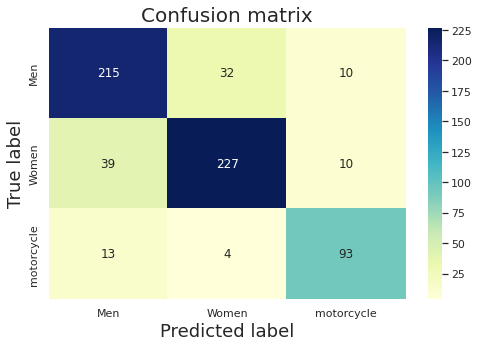

In [19]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)